In [6]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/drive/My Drive/"
project_folder = "APNet_input_data"
os.chdir(root_dir + project_folder)
!pwd

Mounted at /content/drive
/content/drive/My Drive/APNet_input_data


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Load the data from the uploaded files
bulk_common_positive_activity_path = 'Bulk_common_positive_activity.csv'
bulk_common_negative_activity_path = 'Bulk_common_negative_activity.csv'
sc_common_positive_activity_path = 'sc_common_positive_activity.csv'
sc_common_negative_activity_path = 'sc_common_negative_activity.csv'

bulk_positive_df = pd.read_csv(bulk_common_positive_activity_path)
bulk_negative_df = pd.read_csv(bulk_common_negative_activity_path)
sc_positive_df = pd.read_csv(sc_common_positive_activity_path)
sc_negative_df = pd.read_csv(sc_common_negative_activity_path)

In [13]:
bulk_positive_df.head()

,Term,Library,p-value,q-value,z-score,combined score
0,Immune System R-HSA-168256,Reactome_2022,5.442600e-23,3.026100e-20,6.361,326.1
1,Innate Immune System R-HSA-168249,Reactome_2022,1.444400e-16,4.015300e-14,6.416,234.0
2,neutrophil mediated immunity (GO:0002446),GO_Biological_Process_2021,3.806600e-16,6.988900e-13,9.232,327.8
3,neutrophil degranulation (GO:0043312),GO_Biological_Process_2021,2.482400e-15,1.849400e-12,8.938,300.6
4,neutrophil activation involved in immune respo...,GO_Biological_Process_2021,3.021900e-15,1.849400e-12,8.858,296.2


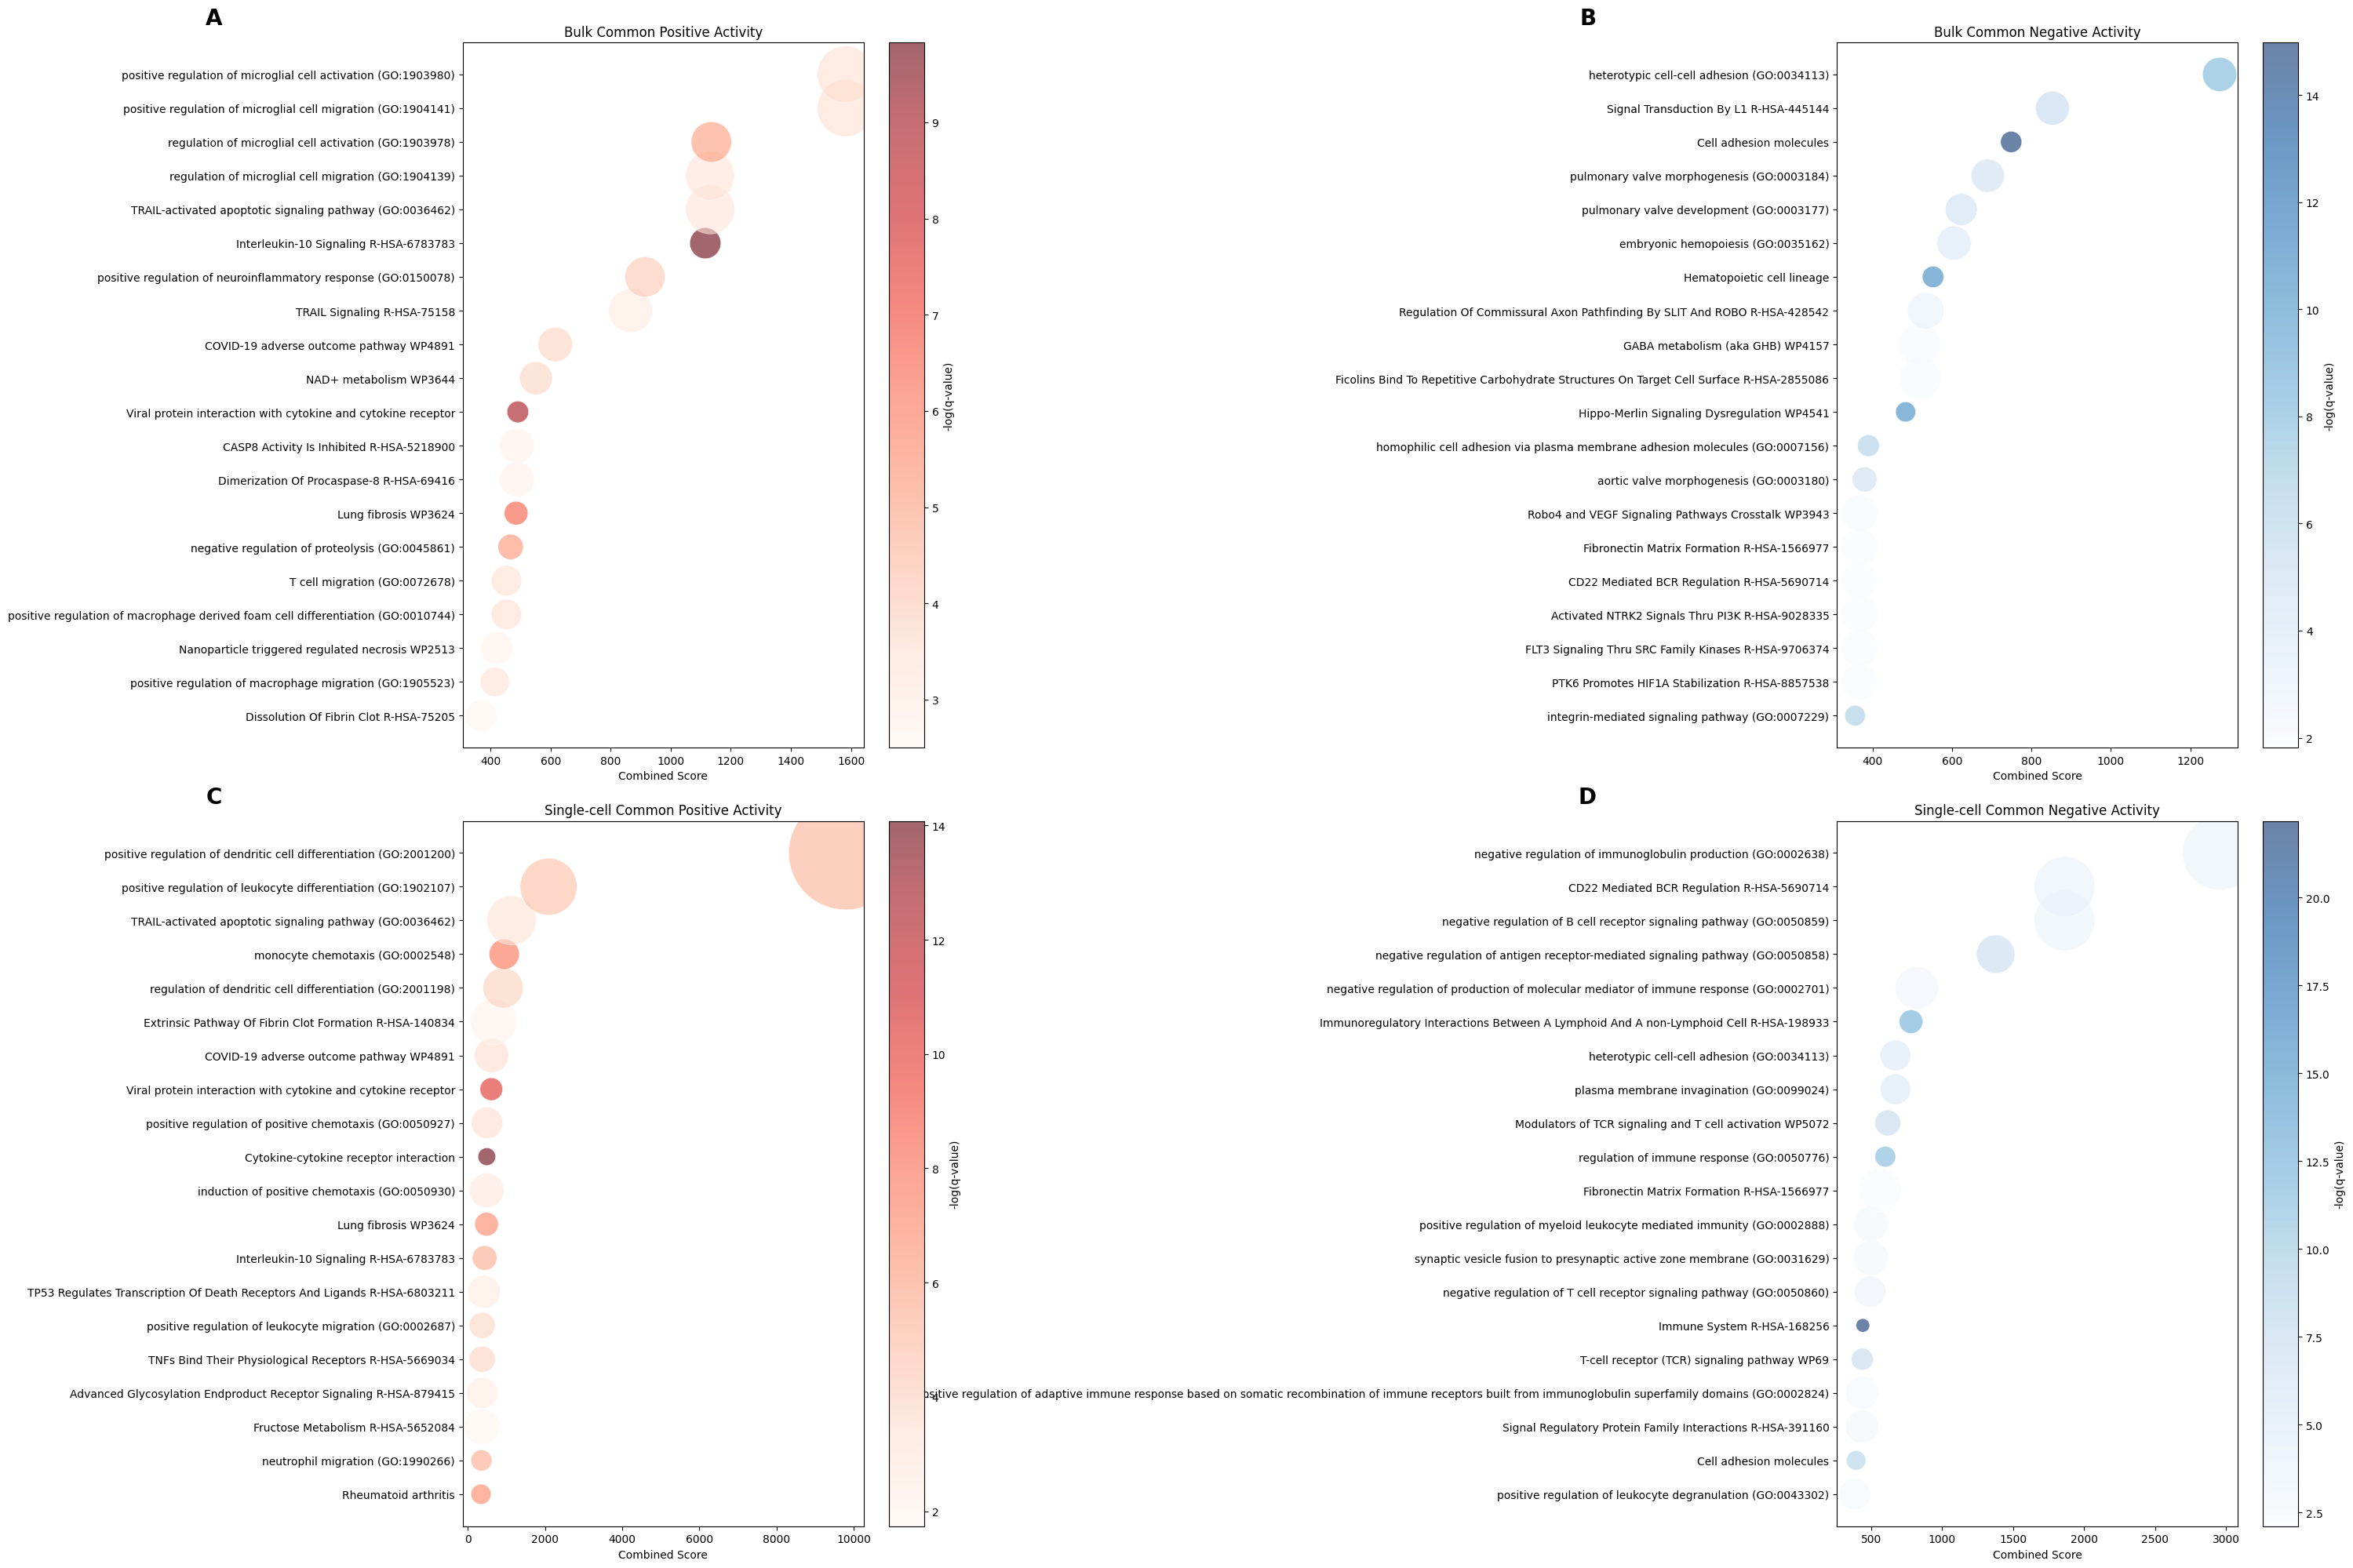

'/mnt/data/combined_bubble_plots_with_labels_titles_v24.png'

In [12]:
# Prepare a function to create the bubble plot for a given dataframe with updated labels and layout, using combined score for x-axis, -log(q-value) for color, and z-score for bubble size, keeping top-20 pathways, and moving A-D labels to the left
def create_bubble_plot_with_label_and_title_v24(ax, df, label, title, cmap):
    df_sorted = df.sort_values(by='combined score', ascending=False).iloc[:20]  # Sort by combined score in descending order and take top 20

    terms = df_sorted['Term'][::-1]  # Reverse the order to have higher combined score first at the top
    combined_scores = df_sorted['combined score'][::-1]  # Use combined score for x-axis
    q_values = -np.log10(df_sorted['q-value'][::-1])  # Use -log(q-value) for color
    z_scores = df_sorted['z-score'][::-1]  # Use z-score for bubble size

    scatter = ax.scatter(combined_scores, terms,
                         c=q_values,
                         s=z_scores * 20,  # Further scale down z-scores for size
                         cmap=cmap,
                         alpha=0.6,
                         edgecolors="w",
                         linewidth=0.5,
                         marker='o')

    colorbar = plt.colorbar(scatter, ax=ax)
    colorbar.set_label('-log(q-value)')

    ax.set_xlabel('Combined Score')
    ax.set_ylabel('')  # Remove y-axis label 'Terms'
    ax.set_title(title)
    ax.text(-0.6, 1.05, label, transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

# Create a 2x2 grid for the plots with expanded width
fig, axs = plt.subplots(2, 2, figsize=(30, 20))

# Plot each dataset in the grid with titles and specified color maps
create_bubble_plot_with_label_and_title_v24(axs[0, 0], bulk_positive_df, 'A', 'Bulk Common Positive Activity', 'Reds')
create_bubble_plot_with_label_and_title_v24(axs[0, 1], bulk_negative_df, 'B', 'Bulk Common Negative Activity', 'Blues')
create_bubble_plot_with_label_and_title_v24(axs[1, 0], sc_positive_df, 'C', 'Single-cell Common Positive Activity', 'Reds')
create_bubble_plot_with_label_and_title_v24(axs[1, 1], sc_negative_df, 'D', 'Single-cell Common Negative Activity', 'Blues')

# Adjust layout
plt.tight_layout()

# Save the combined plot with updated parameters
# output_file_combined_labels_titles_v24 = '/mnt/data/combined_bubble_plots_with_labels_titles_v24.png'
# plt.savefig(output_file_combined_labels_titles_v24, bbox_inches='tight')

# Show plot
plt.show()